## Import necessary libaries

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
import numpy as np

## Import the data

#### train data

In [2]:
flight_train = pd.read_excel('Data_Train.xlsx')
flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
flight_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [5]:
flight_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

## Data understanding

In [6]:
flight_train.shape

(10683, 11)

In [7]:
flight_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight_train.dropna(inplace=True)

In [9]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## EDA

In [10]:
#convert Date of journey into datatime format

flight_train['day_journey'] = pd.to_datetime(flight_train['Date_of_Journey'],format='%d/%m/%Y').dt.day
flight_train['month_journey'] = pd.to_datetime(flight_train['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [11]:
flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_journey,month_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [12]:
del flight_train['Date_of_Journey']

In [13]:
#Convert Dep time into hour and minute

flight_train['Dep_Hour'] = pd.to_datetime(flight_train['Dep_Time']).dt.hour
flight_train['Dep_Minute'] = pd.to_datetime(flight_train['Dep_Time']).dt.minute

In [14]:
del flight_train['Dep_Time']

In [15]:
flight_train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_journey,month_journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [16]:
#Convert Arrival time into hour and minute

flight_train['Arrival_Hour'] = pd.to_datetime(flight_train['Arrival_Time']).dt.hour
flight_train['Arrival_Minute'] = pd.to_datetime(flight_train['Arrival_Time']).dt.minute

In [17]:
del flight_train['Arrival_Time']

In [18]:
flight_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_journey,month_journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [19]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(flight_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [20]:
# Adding duration_hours and duration_mins list to train_data dataframe

flight_train["Duration_hours"] = duration_hours
flight_train["Duration_mins"] = duration_mins

In [21]:
del flight_train['Duration']

In [22]:
flight_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_journey,month_journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


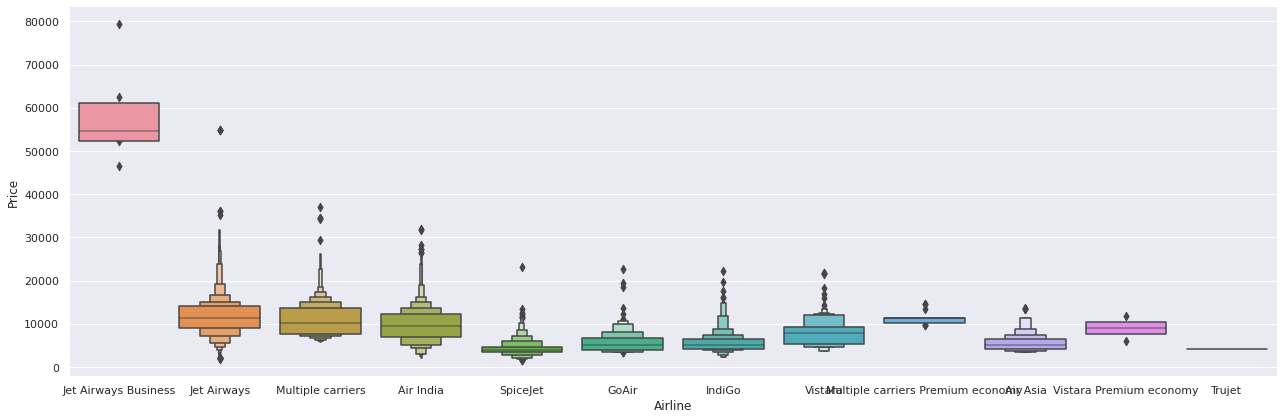

In [23]:
sns.catplot(x='Airline',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

<AxesSubplot:xlabel='Airline', ylabel='Price'>

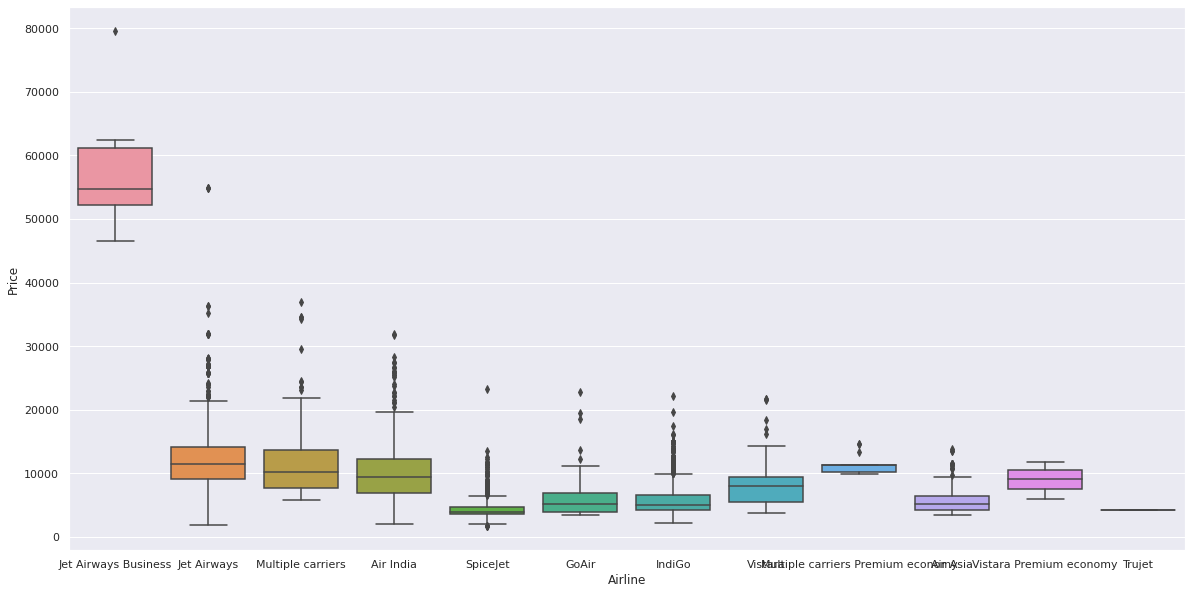

In [24]:
plt.figure(figsize=[20,10])
sns.boxplot(x='Airline',y='Price',data=flight_train.sort_values('Price',ascending=False))

<Figure size 1440x720 with 0 Axes>

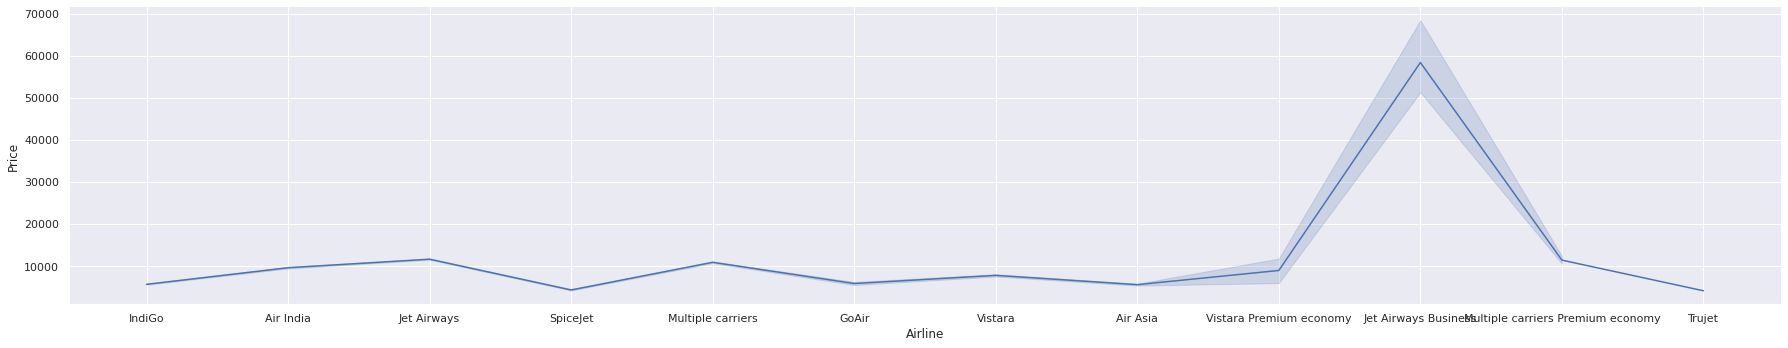

In [25]:
plt.figure(figsize=[20,10])
sns.relplot(x="Airline", y="Price",kind="line", data=flight_train,height=5,aspect=5)

<Figure size 1440x720 with 0 Axes>

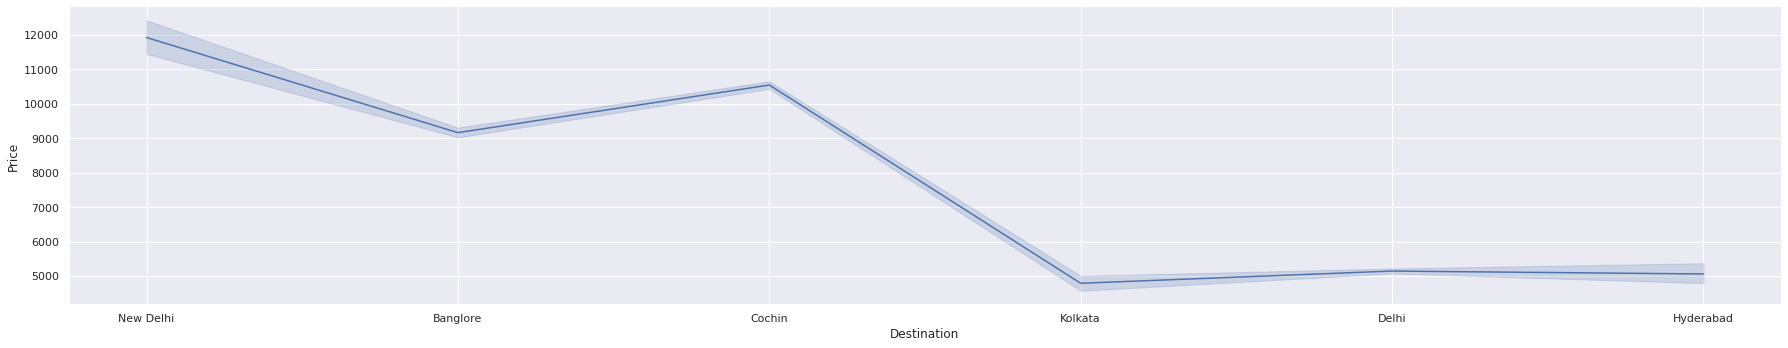

In [26]:
plt.figure(figsize=[20,10])
sns.relplot(x="Destination", y="Price",kind="line", data=flight_train,height=5,aspect=5)

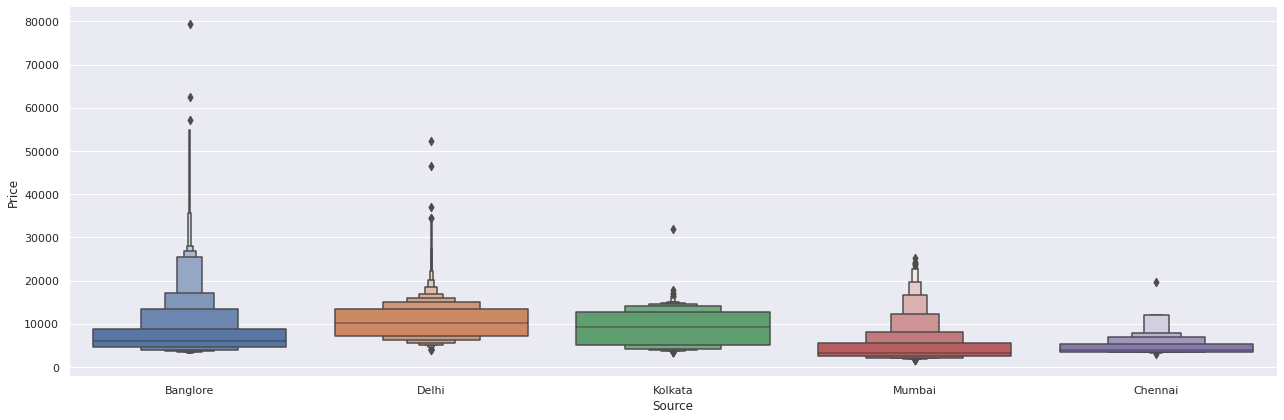

In [27]:
sns.catplot(x='Source',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

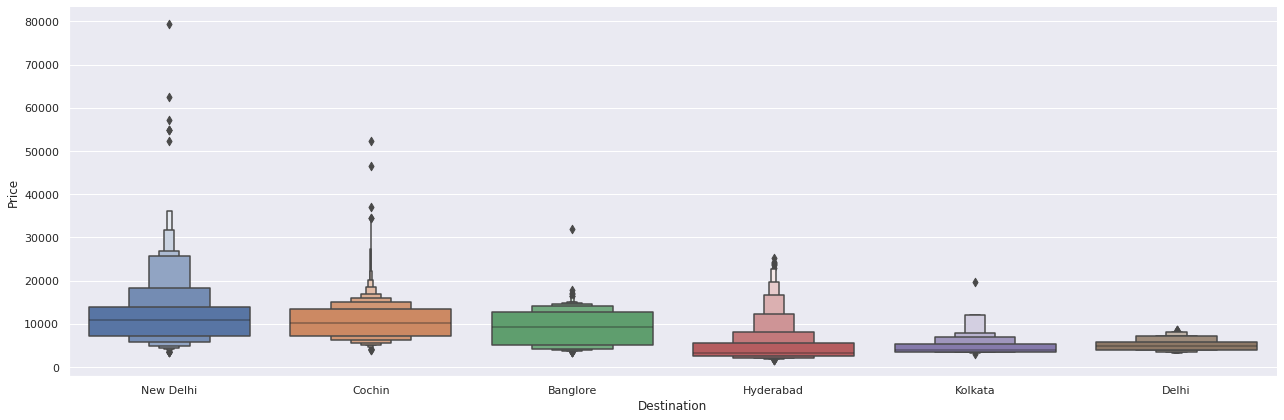

In [28]:
sns.catplot(x='Destination',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

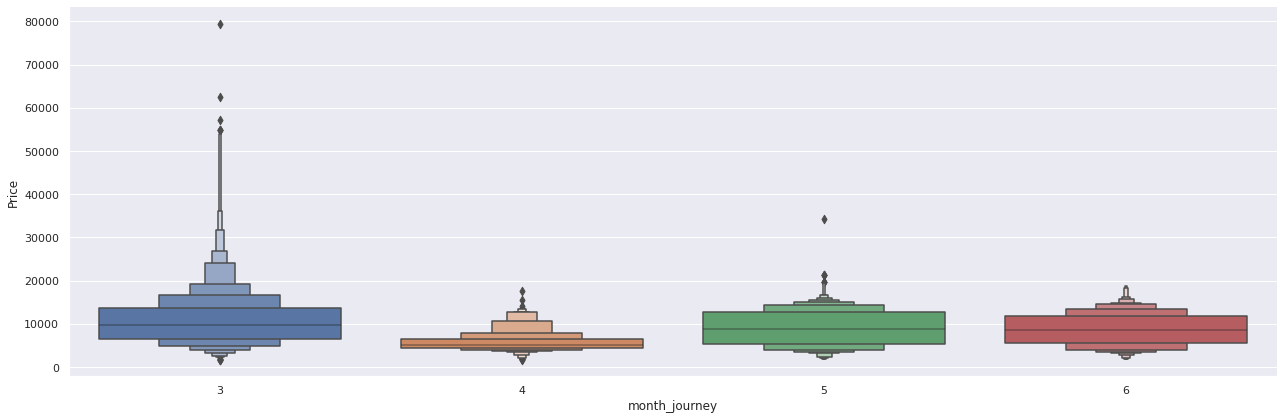

In [29]:
sns.catplot(x='month_journey',y='Price',data=flight_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

## Correlation

In [30]:
flight_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [31]:
lists = []
if len('BLR → DEL'.replace('→','').split()) == 2:
    lists.append(0)

In [32]:
routes_list = []
routes = list(flight_train['Route'])

for i in range(len(routes)):
    if len(routes[i].replace('→','').split()) == 2:
        routes_list.append(0)
    elif len(routes[i].replace('→','').split()) == 3:
        routes_list.append(1)       
    elif len(routes[i].replace('→','').split()) == 4:
        routes_list.append(2)
    elif len(routes[i].replace('→','').split()) == 5:
        routes_list.append(3)
    else:
        routes_list.append(4)

In [33]:
flight_train['Routes'] = routes_list

<AxesSubplot:>

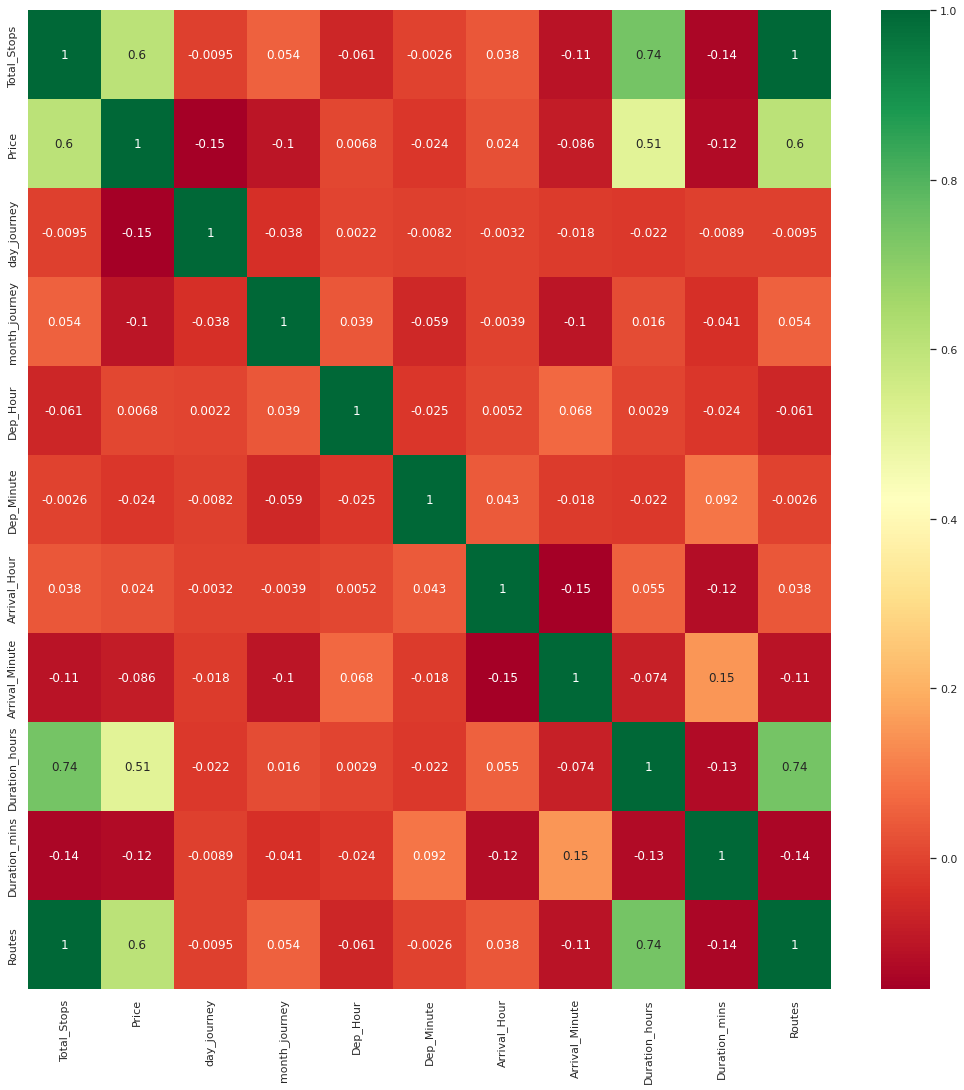

In [34]:
plt.figure(figsize = (18,18))
sns.heatmap(flight_train.corr(),annot=True,cmap = "RdYlGn")

In [35]:
len(flight_train[flight_train['Additional_Info'] == 'No info'])

8344

### Almost 8344 values are no info so drop it

### from graph we knew routes and total_stops is 100% correlated so we drop it

In [36]:
flight_train.drop(['Routes','Route','Additional_Info'],axis=1,inplace=True)

In [37]:
flight_train

,Airline,Source,Destination,Total_Stops,Price,day_journey,month_journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


## One hot encoding for nominal data

In [38]:
airlines = pd.get_dummies(flight_train[['Airline']],drop_first=True)
sources = pd.get_dummies(flight_train[['Source']],drop_first=True)
destination = pd.get_dummies(flight_train[['Destination']],drop_first=True)

In [39]:
flight_train = pd.concat([flight_train,airlines,sources,destination],axis=1)

In [40]:
flight_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [41]:
flight_train

,Total_Stops,Price,day_journey,month_journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [42]:
flight_train.shape

(10682, 30)

In [43]:
flight_train.dtypes

Total_Stops                                  int64
Price                                        int64
day_journey                                  int64
month_journey                                int64
Dep_Hour                                     int64
Dep_Minute                                   int64
Arrival_Hour                                 int64
Arrival_Minute                               int64
Duration_hours                               int64
Duration_mins                                int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [44]:
X = flight_train.drop('Price',axis=1)
y = flight_train['Price']

In [45]:
from sklearn.ensemble import ExtraTreesRegressor

In [46]:
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [47]:
selection.feature_importances_

array([2.09852144e-01, 1.43395106e-01, 5.28434464e-02, 2.43905949e-02,
       2.13962913e-02, 2.75825492e-02, 1.97500222e-02, 1.51025755e-01,
       1.77552511e-02, 8.24483248e-03, 1.79788677e-03, 1.56174418e-02,
       1.36293329e-01, 6.81770485e-02, 1.92855272e-02, 8.26642257e-04,
       2.88616031e-03, 8.21043572e-05, 4.79305069e-03, 7.23285766e-05,
       4.58273062e-04, 9.95797391e-03, 3.46152533e-03, 8.27193108e-03,
       7.64115999e-03, 1.37338929e-02, 5.03688974e-03, 4.07951435e-04,
       2.49628897e-02])

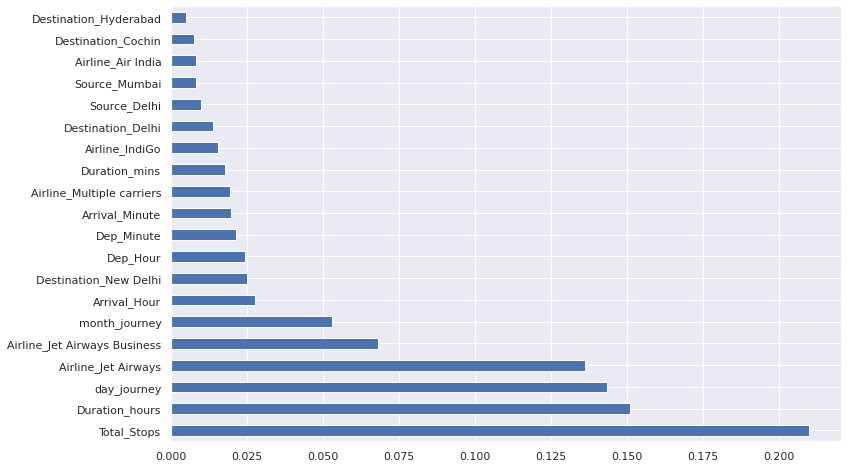

In [48]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
importances = pd.Series(selection.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.show()

## Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

## Model building

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
pred = rf_model.predict(X_test)

In [57]:
rf_model.score(X_train,y_train)

0.9562140615962633

In [58]:
rf_model.score(X_test,y_test)

0.7632589376681628

<AxesSubplot:xlabel='Price', ylabel='Density'>

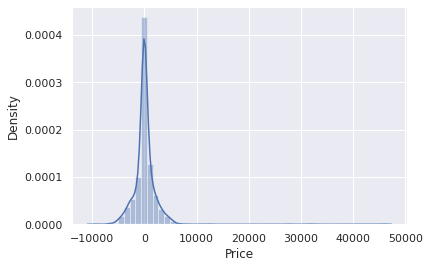

In [72]:
sns.distplot(y_test-pred)

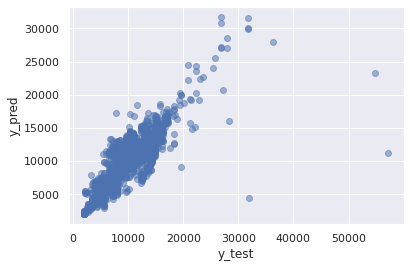

In [74]:
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1203.629800320903
MSE: 5028711.744362274
RMSE: 2242.478928409869


## Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
random_forest = RandomForestRegressor()

In [70]:
best_params_rf = RandomizedSearchCV(estimator=random_forest,param_distributions={
    'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'max_features':['auto', 'sqrt'],
    'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_split':[2, 5, 10, 15, 100],
    'min_samples_leaf':[1, 2, 5, 10]
},scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
best_params_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
best_params_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [76]:
y_pred = best_params_rf.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

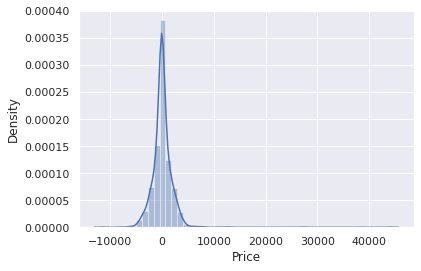

In [82]:
sns.distplot(y_test-y_pred)

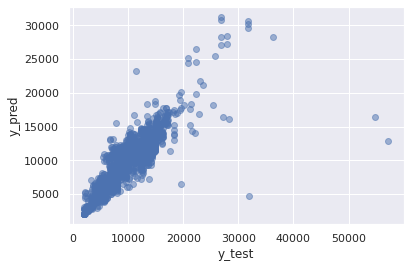

In [83]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
best_params_rf.score(X_train,y_train)

-2053460.081529955

In [88]:
metrics.r2_score(y_test,y_pred)

0.7711144412715093

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1199.7501001791284
MSE: 4861849.845378913
RMSE: 2204.9602820411333


## Save model

In [89]:
import pickle
file = open('model.pkl','wb')
pickle.dump(best_params_rf,file)

In [90]:
model = open('model.pkl','rb')
forest = pickle.load(model)

In [92]:
prediction = forest.predict(X_test)

In [93]:
metrics.r2_score(y_test,prediction)

0.7711144412715093